   # DRISHTI

IMPORT REQUIRED PACKAGES:

In [1]:
#!pip install opencv-python
#!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import glob
import cv2
import matplotlib.pyplot as plt

DATA GATHERING/COLLECTING :


LOADING DATASET FROM OS TO CURRENT PROJECT

In [3]:
for root,directories,files in os.walk('/Dbdaproject/Project_Dataset'):
    for drs in directories:
        print(drs)

cataract
diabetic_retinopathy
glaucoma
normal


In [4]:
normal=Path("/Dbdaproject/Project_Dataset/normal")
cataract=Path("/Dbdaproject/Project_Dataset/cataract")
diabetic_retinopathy=Path("/Dbdaproject/Project_Dataset/diabetic_retinopathy")
glaucoma=Path("/Dbdaproject/Project_Dataset/glaucoma")

print("Path : ",normal)

Path :  \Dbdaproject\Project_Dataset\normal


MERGING ALL THE DATA FILES INTO A SINGLE DIRECTORY

In [5]:
all_images_dir={"normal":list(normal.glob("*.jpg")),
               "cataract":list(cataract.glob("*.jpg")),
               "diabetic_retinopathy":list(diabetic_retinopathy.glob("*.jpeg")),
               "glaucoma":list(glaucoma.glob("*.jpg"))}

print(all_images_dir.keys())


labels_for_images_dir={"normal":0,"cataract":1,"diabetic_retinopathy":2,"glaucoma":3}

print(labels_for_images_dir)
print(labels_for_images_dir.keys())
print(labels_for_images_dir.values())

#printing values in each category
#for a in all_images_dir.values():
#   print(a)

dict_keys(['normal', 'cataract', 'diabetic_retinopathy', 'glaucoma'])
{'normal': 0, 'cataract': 1, 'diabetic_retinopathy': 2, 'glaucoma': 3}
dict_keys(['normal', 'cataract', 'diabetic_retinopathy', 'glaucoma'])
dict_values([0, 1, 2, 3])


GETTING INPUT AND OUTPUT PARAMETERS

In [6]:
input_img_X, output_label_y = [], []

for label, images in all_images_dir.items():
    for img in images:
        img = cv2.imread(str(img))
        if img is not None:
            input_img_X.append(img)
            output_label_y.append(labels_for_images_dir[label])

            
#print(type(input_img_X))
#print(type(output_label_y))

length of input = : 4016
length of output = : 4016
(512, 512, 3)


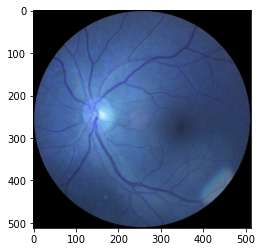

In [7]:
print("length of input = :",len(input_img_X))
print("length of output = :",len(output_label_y))
print(input_img_X[0].shape)
plt.imshow(input_img_X[0])
plt.show()


DATA PREPROCESSING

In [12]:
processed_images=[]
for img in input_img_X:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.resize(img, (256, 256))
    img = cv2.resize(img, (224, 224))
    if img is not None:
            processed_images.append(img)
            
#print(type(output_label_y))
#print(type(processed_images))


In [13]:
output_label_y=np.array(output_label_y)
processed_images=np.array(processed_images)

length of input = : 4016
length of output = : 4016
(224, 224, 3)


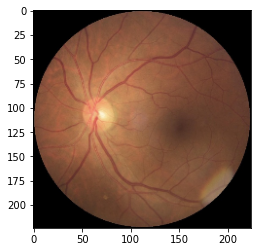

In [14]:
print("length of input = :",len(processed_images))
print("length of output = :",len(output_label_y))
print(processed_images[0].shape)
plt.imshow(processed_images[0])
plt.show()

IMPORT REQUIRED PACKAGES



In [28]:
#!pip install scikit-learn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.applications.vgg16 import VGG16
#from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Flatten,Dropout
from keras.layers import Dense,Flatten
from keras import layers

Splitting whole data into Training and Testing Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(processed_images,output_label_y, test_size=0.2,random_state=23)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3212, 224, 224, 3)
(804, 224, 224, 3)
(3212,)
(804,)


Splitting Training data into Training and Validation Data

In [17]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.20,random_state = 23)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(2569, 224, 224, 3)
(643, 224, 224, 3)
(2569,)
(643,)


Data_augmentation

In [19]:
#input_size = (None,256,256,3)
input_size = (None,224,224,3)

data_augmentation = keras.Sequential([keras.layers.RandomContrast(0.3),
keras.layers.RandomZoom(0.3),
keras.layers.RandomFlip("horizontal_and_vertical"),
keras.layers.RandomRotation(0.3)
])

MODEL BUILDING AND TRAINING

OWN NETWORK

In [33]:
#def built_model():
#    model = keras.Sequential([
#   layers.Conv2D(64,kernel_size=(5, 5), padding="same",   input_shape=(256, 256, 3), activation="softmax"),
#    layers.BatchNormalization(),
#   layers.MaxPooling2D(),
#  layers.Conv2D(32,kernel_size=(5, 5), padding="same", activation="relu"),
# layers.BatchNormalization(),
#layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#    layers.Conv2D(16,kernel_size=(5, 5), padding="same", activation="relu"),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D(),
#    layers.Conv2D(8,kernel_size=(5, 5), padding="same", activation="relu"),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D(),
#    layers.Dropout(0.2),
#    layers.Flatten(),
#    layers.Dense(64, activation='relu'),
#    layers.Dense(32, activation='relu'),
#    layers.Dense(16, activation='relu'),
#    layers.Dense(4, activation="softmax"),
#])   
#    return model

# model = built_model()
#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.build(input_size)
#model.summary()




 PRE-TRAINED MODEL 

In [36]:
vgg=VGG16(input_shape=(224,224,3),weights="imagenet",include_top=False)

In [37]:
for layer in vgg.layers:
    layer.trainable=False

ADDING NEW (OWN) CLASSIFIER LAYERS

In [38]:
flatten_layer1=Flatten()(vgg.layers[-1].output)
dense_layer1=Dense(128,activation="relu")(flatten_layer1)
dense_layer2=Dense(64,activation="relu")(dense_layer1)
output_dense_layer=Dense(4, activation="softmax")(dense_layer2)

In [39]:
pretrained_plus_own_model=Model(inputs=vgg.inputs,outputs=output_dense_layer)

In [41]:
pretrained_plus_own_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [42]:
pretrained_plus_own_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
#Used Early Stopping to Avoid Overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                           mode="min",
                                           patience=5
                                           )

CREATING BATCHES FOR TRAINING

In [44]:
def fetch_batch(X,y, batch_size,batch):
    start=batch*batch_size
    
    X_batch=X[start:start+batch_size,:,:]
    y_batch=y[start:start+batch_size]
    
    return X_batch,y_batch

In [45]:
batch_size=16
loss_history=[]
val_loss_history=[]
acc_history=[]
val_acc_history=[]
no_epochs=5

In [46]:
from tqdm import tqdm
from sklearn.utils import shuffle

In [47]:
for epoch in range(no_epochs):
    X,y=shuffle(X_train,y_train,random_state=epoch**2)
    for batch in tqdm(range(len(X_train)//batch_size)):
        X_batch,y_batch=fetch_batch(X,y,batch_size,batch)
        loss,acc=pretrained_plus_own_model.train_on_batch(X_batch,y_batch)
    loss_history.append(loss)
    acc_history.append(acc)
    
    
    y_pred=pretrained_plus_own_model.predict(X_val)
    val_loss,val_acc=pretrained_plus_own_model.evaluate(X_val,y_val)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    
    print("Epoch: %d , Train_loss: %.3f,Train_Acc: %.3f,Val_loss: %.3f,Val_Acc: %.3f"%(epoch+1,loss,acc,val_loss,val_acc))
        

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [08:55<00:00,  3.35s/it]


21/21 [==============================] - 146s 7s/step - loss: 0.8560 - accuracy: 0.8507
Epoch: 1 , Train_loss: 1.568,Train_Acc: 0.875,Val_loss: 0.856,Val_Acc: 0.851


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [09:47<00:00,  3.67s/it]


21/21 [==============================] - 145s 7s/step - loss: 0.7843 - accuracy: 0.8274
Epoch: 2 , Train_loss: 0.142,Train_Acc: 0.938,Val_loss: 0.784,Val_Acc: 0.827


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [09:45<00:00,  3.66s/it]


21/21 [==============================] - 146s 7s/step - loss: 1.1251 - accuracy: 0.8165
Epoch: 3 , Train_loss: 0.849,Train_Acc: 0.812,Val_loss: 1.125,Val_Acc: 0.816


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [09:33<00:00,  3.58s/it]


21/21 [==============================] - 135s 6s/step - loss: 0.7584 - accuracy: 0.8834
Epoch: 4 , Train_loss: 0.004,Train_Acc: 1.000,Val_loss: 0.758,Val_Acc: 0.883


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [09:08<00:00,  3.43s/it]


21/21 [==============================] - 136s 6s/step - loss: 0.7373 - accuracy: 0.8802
Epoch: 5 , Train_loss: 0.003,Train_Acc: 1.000,Val_loss: 0.737,Val_Acc: 0.880


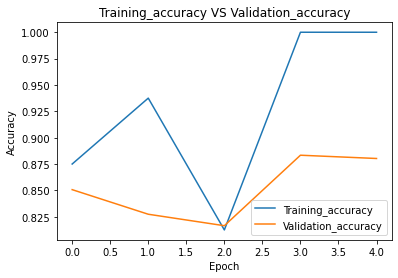

In [48]:
plt.plot(acc_history, label="Training_accuracy")
plt.plot(val_acc_history, label = "Validation_accuracy")
plt.title("Training_accuracy VS Validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")


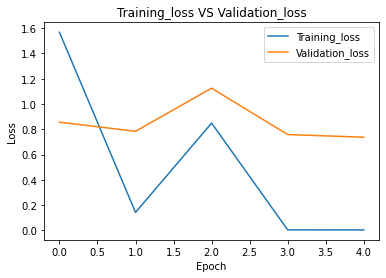

In [49]:
plt.plot(loss_history, label="Training_loss")
plt.plot(val_loss_history, label = "Validation_loss")
plt.title("Training_loss VS Validation_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")


SAVING THE TRAINED MODEL

In [50]:
path="/Dbdaproject/pretrained_plus_own_vgg16model.h5"
pretrained_plus_own_model.save(path)

LOADING THE SAVED MODEL FOR PREDICTIONS

In [51]:
from keras.models import load_model

saved_own_model=load_model("/Dbdaproject/pretrained_plus_own_vgg16model.h5")

INTRODUCING TEST DATA

In [52]:
test_loss,test_acc=saved_own_model.evaluate(X_test,y_test)

26/26 [==============================] - 141s 5s/step - loss: 0.8185 - accuracy: 0.8719


In [53]:
y_preds = saved_own_model.predict(X_test[:5]) # predicting first 10 values
preds_list = []
for i in y_preds:
    preds_list.append(np.argmax(i)) # argmax() returns max value of an array

1/1 [==============================] - 1s 858ms/step


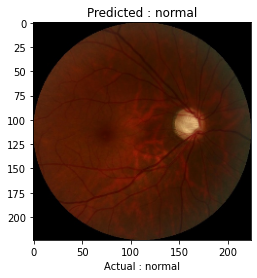

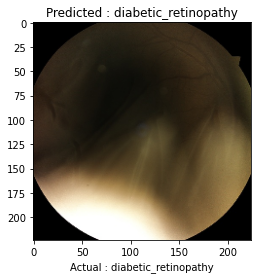

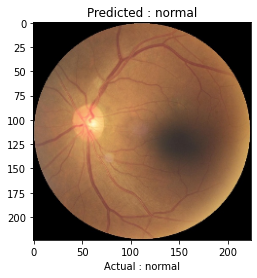

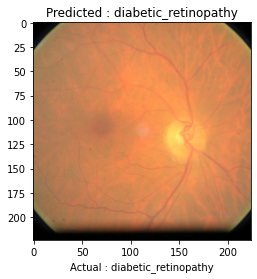

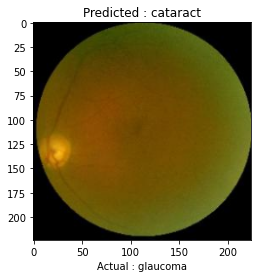

In [54]:
labels = ["normal","cataract","diabetic_retinopathy","glaucoma"]
for i in range(5):
    plt.imshow(X_test[i])
    plt.title("Predicted : "+ str(labels[preds_list[i]]))
    plt.xlabel("Actual : "+str(labels[y_test[i]]))
    plt.show()